# Studi Kasus Simple Linear Regression

C:\Users\Ivriel Gunawan\AppData\Local\Temp\ipykernel_5532\1637643610.py:6: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r'E:\pythonjupyter\Tokopedia.csv')


Data Kosong:
 Date              0
Last Crawling     0
SKU Name          0
Product Name      0
Url Product       0
Seller            0
Merchant          0
Stock             0
Item Condition    0
Filter            0
Flag              0
Bottom Price      0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64
Data Duplikat:
 0


Cleaned Data:
 Date               object
Last Crawling      object
SKU Name           object
Product Name       object
Url Product        object
Seller             object
Merchant           object
Stock              object
Item Condition     object
Filter             object
Flag               object
Bottom Price        int64
Original Price    float64
Discount          float64
Selling Price       int64
Discrepancy       float64
Sales Quantity      int64
Sales Revenue       int64
dtype: object


Jumlah Baris:
 32772
Jumlah Variabel:
 18
Jumlah kolom bertipe data numerik:
 7
Jumlah kolom b

e:\pythonjupyter\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
e:\pythonjupyter\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


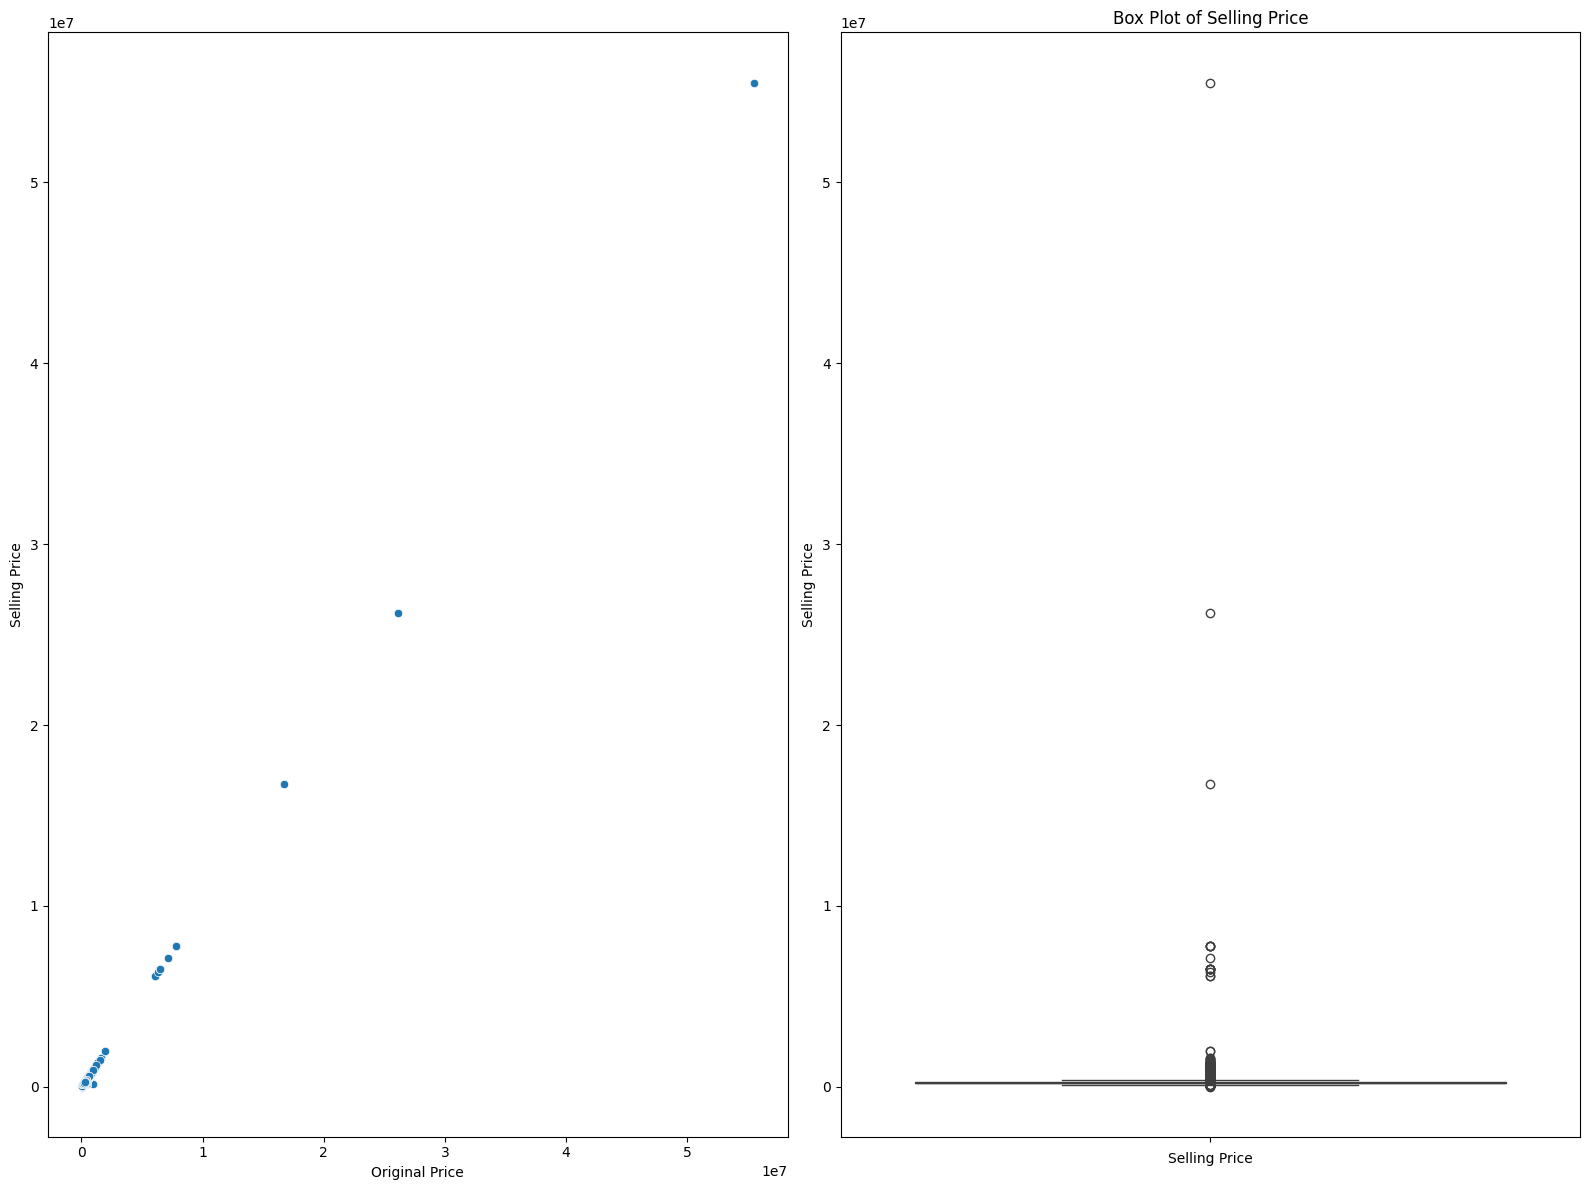

Intercept(a): -152.27718104457017
Slope(b): 0.9998255291212779
Prediksi Dari Selling Price
       Original Price  Selling Price  Prediksi Selling Price
0           271900.0         271900                271700.0
1           256550.0         256550                256353.0
2           286500.0         286500                286298.0
3           263724.0         263724                263526.0
4           231000.0         231000                230807.0
...              ...            ...                     ...
6549        244000.0         244000                243805.0
6550        212000.0         212000                211811.0
6551        271733.0         271733                271533.0
6552        210000.0         210000                209811.0
6553        274900.0         274900                274700.0

[6554 rows x 3 columns]
MSE 35340896.0
Rsquare adalah
 0.9989993344973335


In [1]:
import pandas as pd
import  matplotlib.pyplot as  plt
import seaborn as sns

#Preparation Data
dataset = pd.read_csv(r'E:\pythonjupyter\Tokopedia.csv')
print("Data Kosong:\n",dataset.isnull().sum())
print("Data Duplikat:\n",dataset.duplicated().sum())
print("\n")
dataset['Original Price'] = pd.to_numeric(dataset["Original Price"],errors="coerce")
dataset['Discount'] = pd.to_numeric(dataset["Discount"],errors="coerce")
print("Cleaned Data:\n",dataset.dtypes)

print("\n")

#Eda

#Jumlah variabel dan kolom
rows,columns = dataset.shape
print("Jumlah Baris:\n",rows)
print("Jumlah Variabel:\n",columns)

#Jumlah kolom yang bertipe data teks dan juga numerik
numeric_columns = dataset.select_dtypes(include=['number']).shape[1]
object_columns = dataset.select_dtypes(include=['object']).shape[1]
print("Jumlah kolom bertipe data numerik:\n",numeric_columns)
print("Jumlah kolom bertipe data teks:\n",object_columns)
print("\n")

#Corelasi antara semua kolom yang bertipe data numerik
print("Tipe Data:\n",dataset.dtypes)
correlation_1 = dataset["Original Price"].corr(dataset["Discount"])
print("Korelasi antara harga toko dan juga harga setelah diskon\n",correlation_1)
correlation_2 = dataset["Original Price"].corr(dataset["Sales Quantity"])
print("Korelasi antara harga toko dan juga jumlah penjualan\n",correlation_2)
correlation_3 = dataset["Bottom Price"].corr(dataset["Original Price"])
print("Korelasi antara harga Grosir dan juga harga toko\n",correlation_3) # Tidak ada korelasi 
correlation_4 = dataset["Original Price"].corr(dataset["Selling Price"])
print("Korelasi antara harga toko dan harga setelah diskon\n",correlation_4)
correlation_5 = dataset["Original Price"].corr(dataset["Discrepancy"])
print("Korelasi antara harga toko dan perbedaan harga\n",correlation_5)
correlation_6 = dataset['Discrepancy'].corr(dataset['Selling Price'])
print("Korelasi antara perbedaan harga dan harga setelah diskon\n",correlation_6)
print("\n")


#Heatmap Correlation
  

#Visualisasi dari EDA
plt.figure(figsize=(16,12)) # 16 x 12 pixel

#  Visualisasi Original Price  vs Selling Price Scatter Map
plt.subplot(1,2,1)  # posisi pertama (1 baris 2 kolom)
sns.scatterplot(x="Original Price", y="Selling Price", data=dataset)
plt.xlabel("Original Price")
plt.ylabel("Selling Price")

#Visualisasi Original Price vs Selling Price BoxPlot

plt.subplot(1,2,2)
sns.boxplot(y="Selling Price",data=dataset)
plt.title("Box Plot of Selling Price")
plt.xlabel("Selling Price")

plt.tight_layout()
plt.show()

#Modelling Simple Linear Regression
dataset.dropna(subset=['Original Price', 'Selling Price'], inplace=True) #Hapus baris yang ada nilai NaN

#Setting Variabel


x=dataset['Original Price'].values 
y=dataset['Selling Price'].values

#Splitting data 80 persen training size dan 20 persen test set

train_size = int(len(x) * 0.8) #80 persen dari data untuk latihan

xtrain, xtest = x[:train_size],x[train_size:] #Bagi x jadi 80 persen data latihan
ytrain,ytest = y[:train_size],y[train_size:] #Bagi y jadi 80 persen data latihan

#Hitung rata rata dari data latihan
x_mean = xtrain.mean() 
y_mean = ytrain.mean()

#Mencari slope dan intercept

pembilang = ((xtrain - x_mean) * (ytrain - y_mean)).sum() # Numerator
penyebut =  ((xtrain -x_mean) ** 2).sum() # Denominator 
slope = pembilang / penyebut
intercept = y_mean - slope * x_mean

print("Intercept(a):",intercept)
print("Slope(b):",slope)

#Prediksi Model
test_predict_y =  intercept + slope * xtest
predict_selling= pd.DataFrame({"Original Price":xtest,"Selling Price":ytest,"Prediksi Selling Price":test_predict_y.round()})
print("Prediksi Dari Selling Price\n",predict_selling)

#Perhitungan Akurasi Model (Evaluasi)

#Mse

mse = ((ytest - test_predict_y)**2).mean()
print("MSE", mse.round())

#R Square

total_variasi = ((ytest - ytest.mean())**2).sum()
residuals= ((ytest - test_predict_y)**2).sum()
rsquare = 1 -(residuals / total_variasi)
print("Rsquare adalah\n",rsquare)

# Multi Linear Regression

In [28]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv(r"E:\pythonjupyter\Tokopedia.csv")
correlation_4 = dataset["Original Price"].corr(dataset["Selling Price"])
correlation_6 = dataset['Discrepancy'].corr(dataset['Selling Price'])
# Pisahkan fitur dan target
data.replace('-',np.nan,inplace=True)
data.dropna(inplace=True)
X = data[['Original Price', 'Discrepancy']].values.astype(float)
y = data['Selling Price'].values.astype(float)

# Tambah kolom konstanta
X = np.c_[np.ones(X.shape[0]), X]

# Hitung koefisien
b = np.linalg.inv(X.T @ X) @ X.T @ y

# Prediksi harga rumah
y_pred = X @ b

print("Berdasarkan 2 Korelasi Terkuat dengan Selling Price\n",
      pd.DataFrame({"Korelasi Original Price": correlation_4, "Korelasi Discrepancy": correlation_6}))
print("")
print(pd.DataFrame({"Original Price":data['Original Price'],"Discrepancy":data['Discrepancy'],"Selling Price":data['Selling Price'],"Prediksi Harga Rumah":y_pred.round()}))

C:\Users\Ivriel Gunawan\AppData\Local\Temp\ipykernel_5532\334412752.py:5: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"E:\pythonjupyter\Tokopedia.csv")


ValueError: If using all scalar values, you must pass an index